# 1.1

In [1]:
import math

with open('input.txt', encoding='utf8') as f:
    content = f.readlines()

num = int(content[0].split(' = ')[1])
x = [float(i) for i in content[1].split(' ')]

print(num)


12200


In [2]:
import random

random.shuffle(x)


In [3]:
class Sample(object):
    
    def __init__(self, values):
        self.values = values
    
    def mean(self):
        return st.tmean(self.values)
    
    def median(self):
        return np.median(self.values)

    def mid(self):
        return (min(self.values) + max(self.values)) / 2
    
    def mode(self):
        return st.mode(self.values)[0][0]
    
    def variance(self):
        return np.var(self.values)
    
    def std(self):
        return np.std(self.values)
    
    def moment(self, k):
        return st.moment(self.values, k)
    
    def skewness(self):
        return st.skew(self.values)
    
    def kurtosis(self):
        return st.kurtosis(self.values)
    
    def percentile(self, q):
        return np.percentile(self.values, q)
    
    def interval_mean(self, q):
        c = self.mean()
        s = self.std()
        n = len(self.values)
        delta = s / math.sqrt(n) * st.t.ppf((1+q)/2, n - 1)
        left = c - delta
        right = c + delta
        return (left, right)
    
    def interval_variance(self, q):
        s = self.std()
        n = len(self.values)
        left = (n - 1) * (s ** 2) / st.chi2.ppf((1+q)/2, n - 1)
        right = (n - 1) * (s ** 2) / st.chi2.ppf((1-q)/2, n - 1)
        return (left, right)   
        
    def clopper_pearson(k, n, alpha):
        '''TODO alpha = 1 - p'''
        left = st.norm.ppf(alpha/2, k, n-k+1)
        right = st.norm.ppf(1 - alpha/2, k+1, n-k)
        return (left, right)
        
    def __str__(self):
        return str(self.values)
    

In [4]:
samples = [Sample(x)]

samples_num = 10
for i in range(samples_num):
    start = int(i*num/10)
    end = int((i+1)*num/10)
    samples.append(Sample(x[start : end]))


# 1.2

In [5]:
num_bins = 20


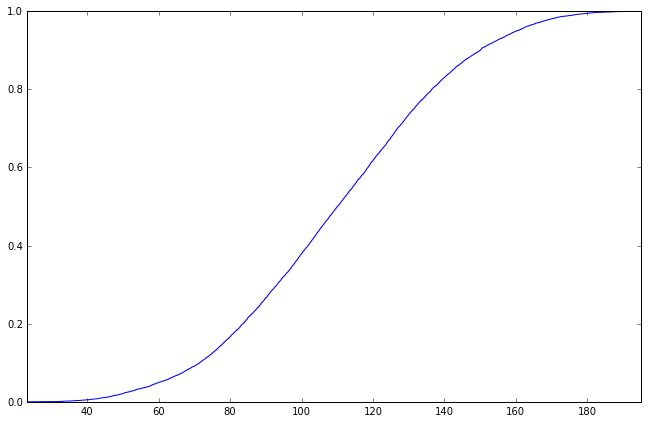

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

plt.figure(figsize=(11, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True)
plt.xlim([min(x), max(x)-1])
plt.show()


[   10.    55.   165.   277.   390.   627.   921.  1110.  1212.  1272.
  1233.  1271.  1102.   892.   648.   454.   330.   150.    63.    18.]


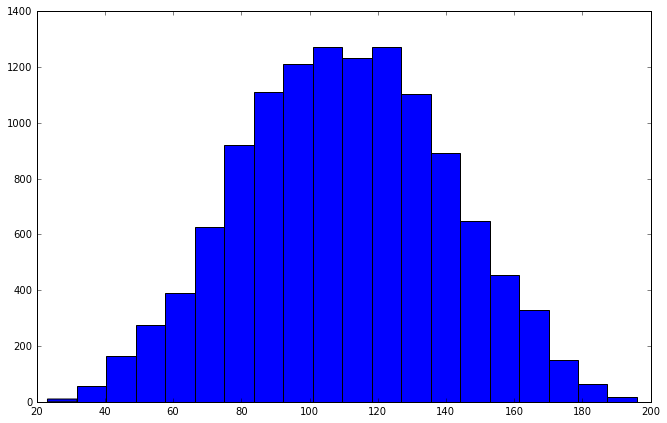

[   6.   18.   25.   41.   47.   75.  125.   85.  129.   99.  134.  129.
   94.   74.   44.   43.   23.   16.   10.    3.]


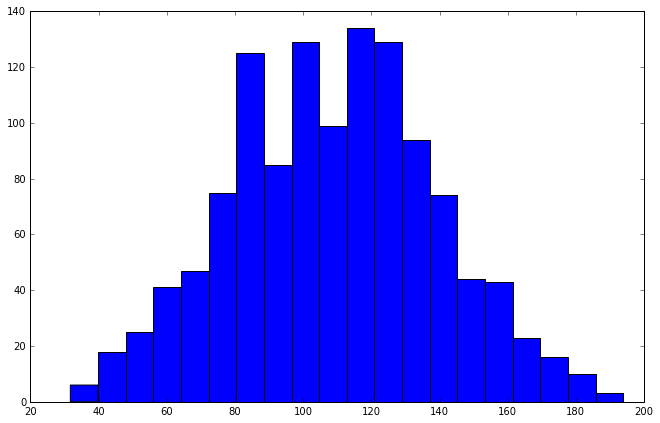

[   6.   18.   22.   40.   55.   85.   87.  101.  100.  121.  106.  118.
  101.   84.   82.   44.   31.   13.    3.    3.]


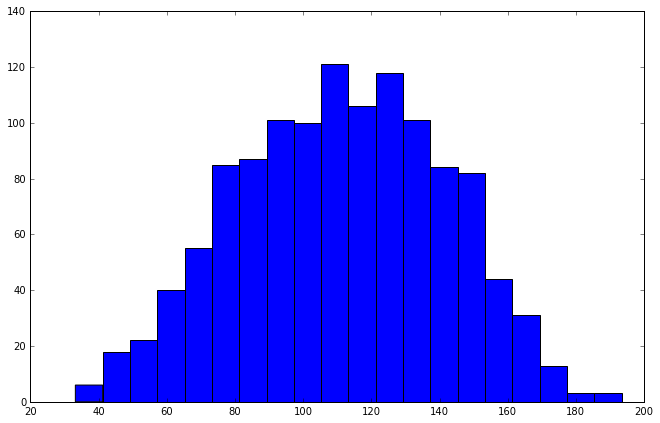

[   3.    9.   21.   14.   38.   50.  100.  121.  106.  125.  111.  138.
  108.   73.   71.   40.   48.   24.   12.    8.]


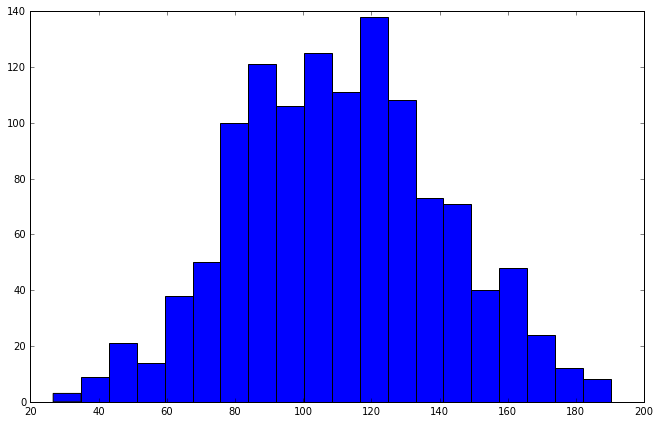

[   3.   17.   19.   26.   50.   64.   93.  114.  114.  120.  123.  130.
  107.   87.   58.   41.   30.   14.    8.    2.]


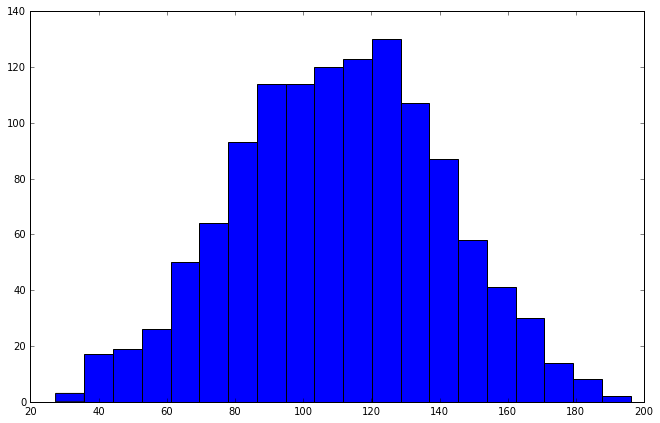

[   4.   19.   26.   50.   46.   67.   79.  102.  129.  114.  110.  102.
  125.   94.   60.   48.   22.   19.    3.    1.]


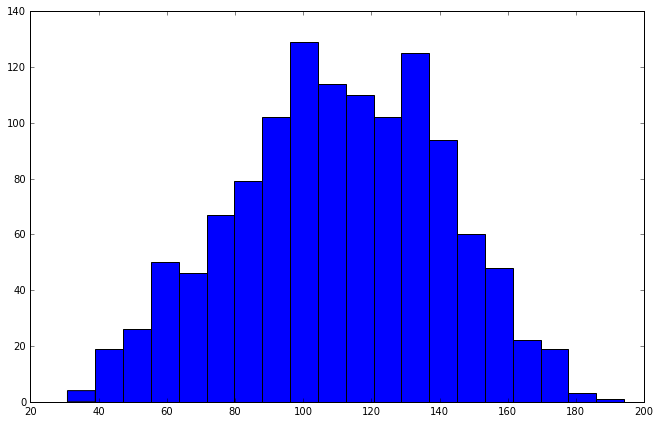

[   8.   17.   27.   26.   51.   84.   93.  116.  114.  106.  117.  119.
  104.   74.   60.   34.   39.   23.    5.    3.]


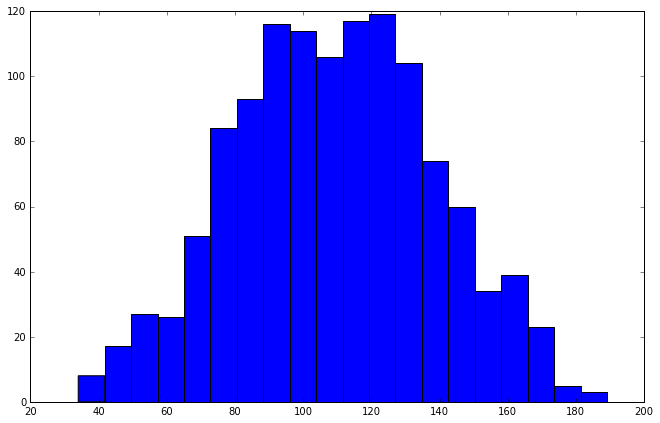

[   2.    5.    8.   32.   36.   51.   88.   92.  128.  135.  115.  109.
  117.  101.   73.   50.   35.   28.   14.    1.]


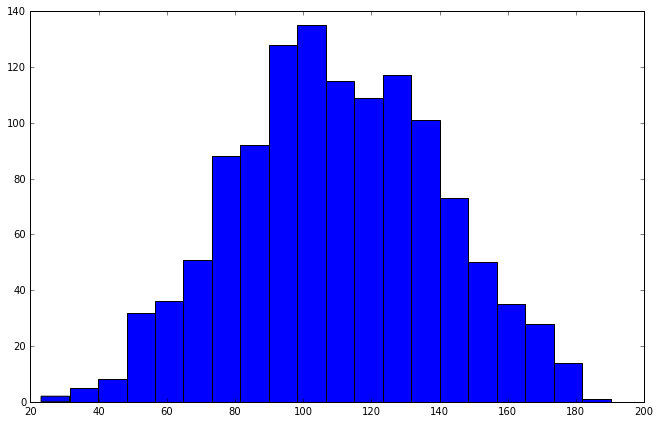

[   3.    8.   21.   25.   42.   63.   85.  100.  124.  129.  106.  133.
   99.   93.   66.   49.   34.   21.   13.    6.]


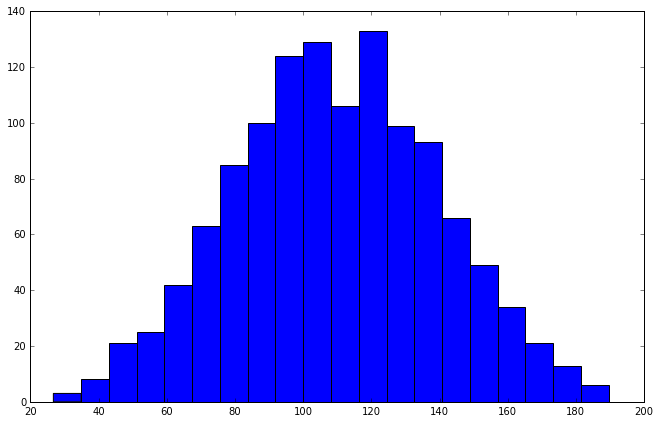

[   6.   13.   23.   38.   53.   91.   94.  101.  101.  126.  107.  115.
   87.   87.   59.   48.   38.   19.    6.    8.]


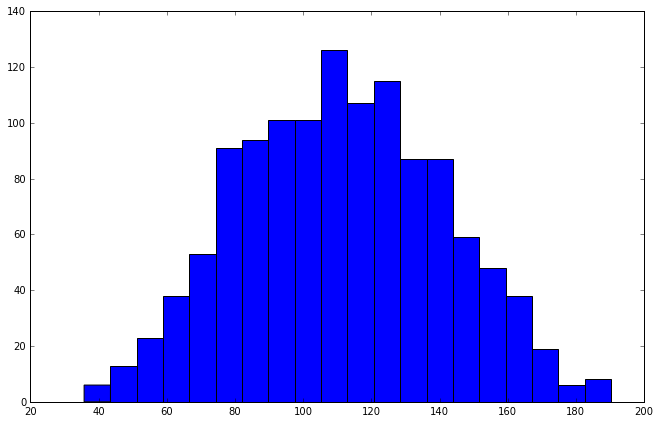

[   8.   15.   19.   30.   61.   75.  103.  109.  132.  115.  117.   95.
   97.   70.   61.   47.   33.   17.   11.    5.]


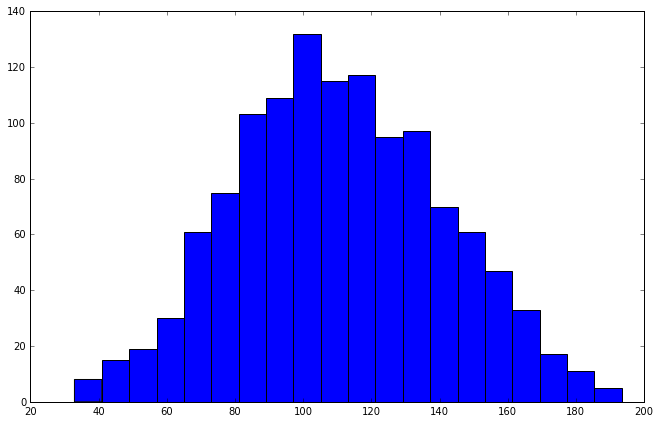

In [7]:
for s in samples:
    plt.figure(figsize=(11, 7))
    (n, bins, patches) = plt.hist(s.values, num_bins)
    print(n)
    plt.show()


# 1.3

In [8]:
import pandas as pd
import scipy.stats as st

d = {}

for i in range(len(samples)):
    s = samples[i]
    stat = {}
    stat[r'$\bar{x}$'] = s.mean()
    stat[r'$x_{med}$'] = s.median()
    stat[r'$x_{mid}$'] = s.mid()
    stat[r'$x_{mode}$'] = s.mode()
    stat[r'$s^2$'] = s.variance()
    stat[r'$s$'] = s.std()
    stat[r'$\hat{m}_3$'] = s.moment(3)
    stat[r'$\hat{m}_4$'] = s.moment(4)
    stat[r'$As$'] = s.skewness()
    stat[r'$Ex$'] = s.kurtosis()
    d[i] = pd.Series(stat)


In [9]:
keys = [r'$\bar{x}$', r'$x_{med}$', r'$x_{mid}$', r'$x_{mode}$', r'$s^2$', r'$s$',
        r'$\hat{m}_3$', r'$\hat{m}_4$', r'$As$', r'$Ex$']

df = pd.DataFrame(d, index=keys).transpose()
df

,$\bar{x}$,$x_{med}$,$x_{mid}$,$x_{mode}$,$s^2$,$s$,$\hat{m}_3$,$\hat{m}_4$,$As$,$Ex$
0,110.146511,110.0465,109.59490,101.0970,902.224343,30.037050,89.286287,2.078277e+06,0.003295,-0.446862
1,108.999235,109.4095,112.80630,105.8150,903.780138,30.062936,861.695980,2.113265e+06,0.031715,-0.412810
2,111.002929,111.5380,113.28895,80.9234,910.491217,30.174347,-2310.498986,1.983022e+06,-0.084099,-0.607918
3,110.612213,110.2010,108.44205,109.6250,896.898293,29.948260,1592.848597,2.158230e+06,0.059301,-0.317058
4,110.402927,110.9160,111.72105,122.2520,920.338272,30.337078,-1024.917064,2.231011e+06,-0.036709,-0.366055
5,110.062518,110.9740,112.51430,112.4550,932.281265,30.533281,-3081.510581,2.114006e+06,-0.108254,-0.567727
6,109.154994,108.9335,111.58200,105.1500,857.971087,29.291143,46.212499,1.878748e+06,0.001839,-0.447749
7,109.967396,109.5430,106.65390,117.9950,889.104353,29.817853,56.385596,2.029799e+06,0.002127,-0.432280
8,109.619413,108.6215,108.17920,100.6270,897.741495,29.962335,683.427766,2.129265e+06,0.025408,-0.358035
9,111.105729,110.7305,113.00970,120.4560,884.912453,29.747478,1632.710229,1.922419e+06,0.062024,-0.545023


In [10]:
df.columns = ['x_avg', 'x_med', 'x_mid', 'x_mode', 's^2', 's', 'm_3', 'm_4', 'As', 'Ex']
df.to_csv('table.csv')

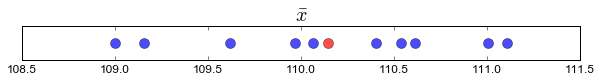

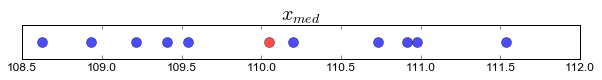

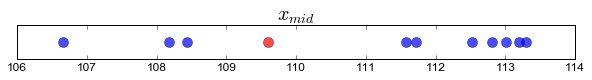

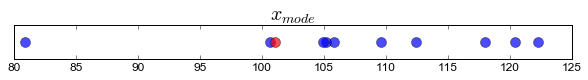

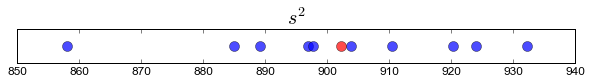

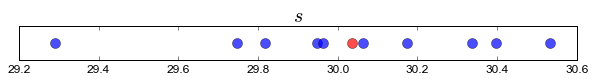

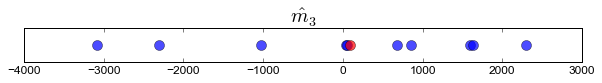

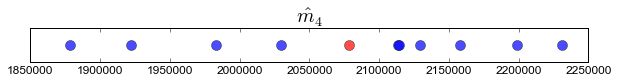

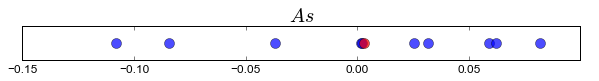

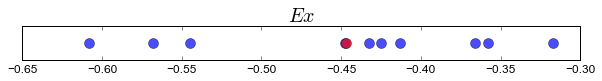

In [11]:
from matplotlib import rc

font = {'family': 'Arial', 'weight': 'normal'}
rc('font', **font)

size = len(d) - 1

for i in range(len(keys)):
    key = keys[i]
    y = np.zeros(size)
    plt.figure(figsize=(10, 0.6))
    plt.title(key, fontsize=20)
    plt.plot([d[i][key] for i in range(1, size + 1)], y, marker='o', linestyle='None', alpha=0.7, markersize=10)
    plt.plot(d[0][key], 0, marker='o', color='r', alpha=0.7, markersize=10)
    plt.yticks([])
    plt.xticks(fontsize=12)
    plt.show()

In [12]:
print(samples[0].percentile(2.5), end=' -- ')
print(samples[0].percentile(97.5))

51.46851 -- 167.7943


Получили границы интерквантильного промежутка:
$$J_{0.95} \approx [51, 168]$$

# 1.4

In [13]:
for sample in samples:
    print(sample.interval_mean(0.8))

(109.79798341004171, 110.49503826208947)
(107.89560589625198, 110.10286328407589)
(109.8952098754099, 112.11064717377047)
(109.51279367345442, 111.71163140851276)
(109.28923462790114, 111.51661979832839)
(108.94162301597852, 111.18341370533297)
(108.07969838787612, 110.23028980884517)
(108.87276453104519, 111.06202760010237)
(108.51947756967562, 110.7193486598326)
(110.01368106691847, 112.19777712980284)
(109.42183720761422, 111.65367230058253)


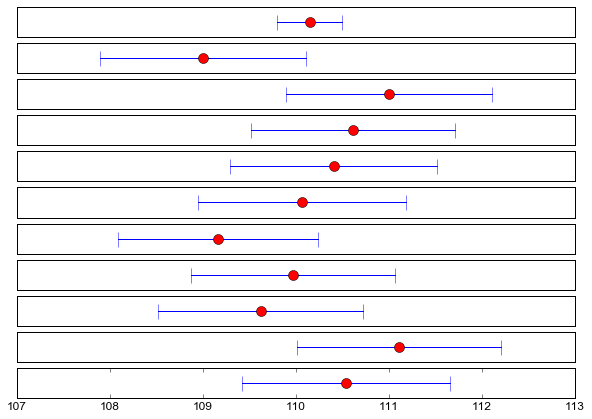

In [14]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_mean(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.mean(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

In [15]:
for sample in samples:
    print(sample.interval_variance(0.8))

(887.6282171287985, 917.24305488751872)
(858.90378089691251, 952.89803935152179)
(865.28162750168019, 959.97384651425364)
(852.36364750371877, 945.64218552239572)
(874.63973607440255, 970.35606104086094)
(885.98971115377117, 982.94812227096168)
(815.36933528545376, 904.59939544044846)
(844.95670821167323, 937.42466676655135)
(853.1649811118358, 946.53121318885189)
(840.97295268546554, 933.00494838294503)
(878.13797874227362, 974.23713439684172)


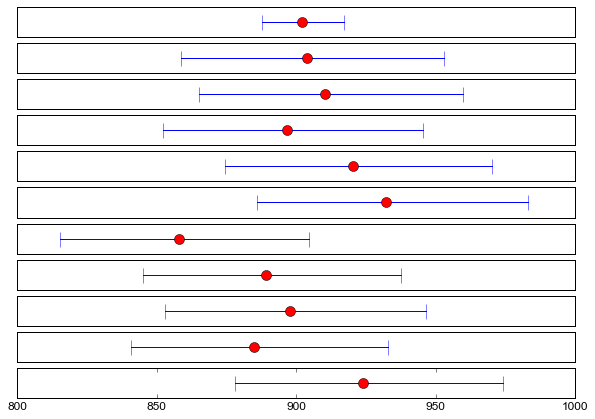

In [16]:
q = 0.8

fig = plt.figure(figsize=(10, 7))
size = len(samples)

for i in range(size):
    s = samples[i]
    if i > 0:
        ax = fig.add_subplot(size, 1, i+1, sharex = ax_prev)
    else:
        ax = fig.add_subplot(size, 1, i+1)
    xes, y = list(s.interval_variance(0.8)), [0, 0]
    ax.plot(xes, y, marker = '|', markersize=15)
    ax.plot(s.variance(), 0, color='red', marker = 'o', markersize=10)
    plt.yticks([])
    if (i != size - 1):
        ax.get_xaxis().set_visible(False)
    plt.xticks(fontsize=12)
    ax_prev = ax

plt.show()

# 2.1

Остановим выбор на трех основных распределениях:
* Нормальное
* Логнормальное
* Гамма (Эрланга)

<img src="dist_info.png" width=1000px>

# 2.2

## Нормальное распределение

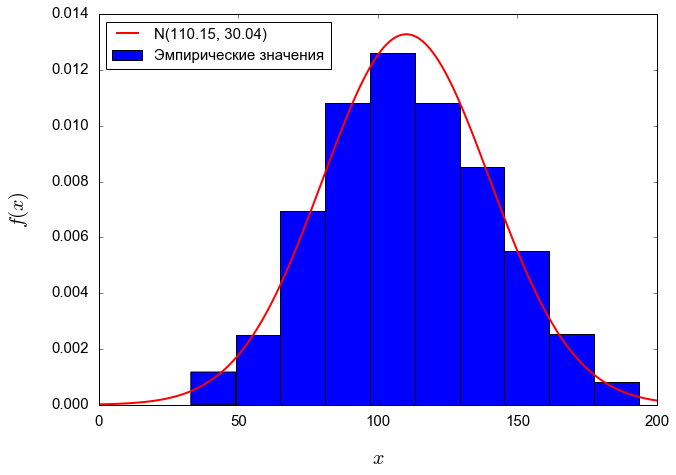

In [17]:
import matplotlib.mlab as mlab

loc, scale = st.norm.fit(x)
xes = np.linspace(0, 200, num)

norm_mu = loc
norm_sigma = scale

norm_pdf = st.norm.pdf(xes, loc=loc, scale=scale)
norm_cdf = st.norm.cdf(xes, loc=loc, scale=scale)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, norm_pdf, label='N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_norm.png')
plt.show()


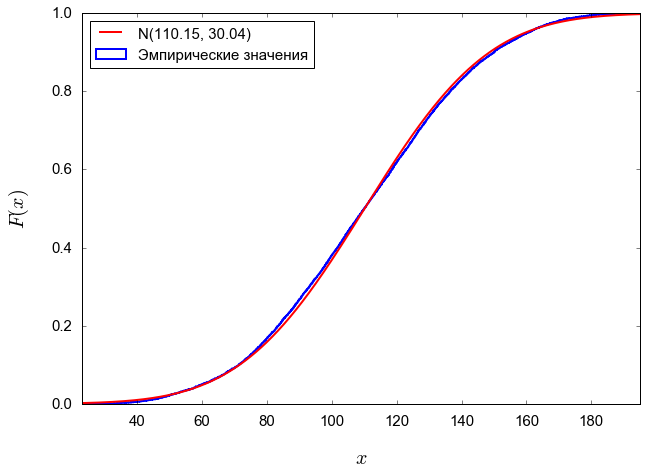

In [18]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, norm_cdf, label='N({0:.2f}, {1:.2f})'.format(norm_mu, norm_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_norm.png')
plt.show()


## Логнормальное распределение

0.0248120120924
-1094.56219139
1204.35542043


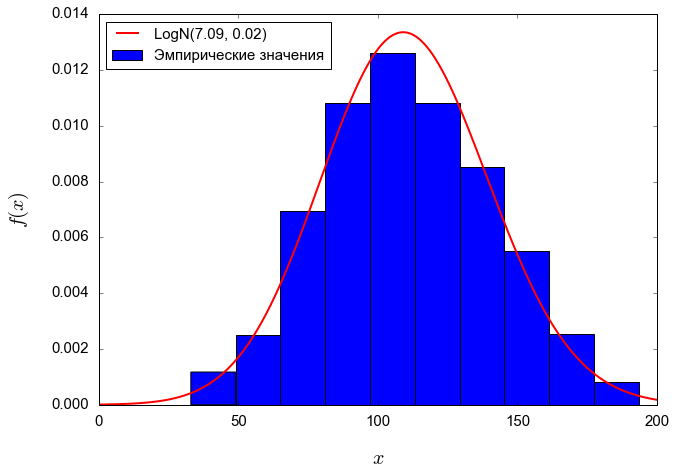

In [19]:
shape, loc, scale = st.lognorm.fit(x)

print(shape)
print(loc)
print(scale)

logn_mu = math.log(scale)
logn_sigma = shape

logn_pdf = st.lognorm.pdf(xes, logn_sigma, loc=loc, scale=math.exp(logn_mu))
logn_cdf = st.lognorm.cdf(xes, logn_sigma, loc=loc, scale=math.exp(logn_mu))

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, logn_pdf, label='LogN({0:.2f}, {1:.2f})'.format(logn_mu, logn_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_lognorm.png')
plt.show()


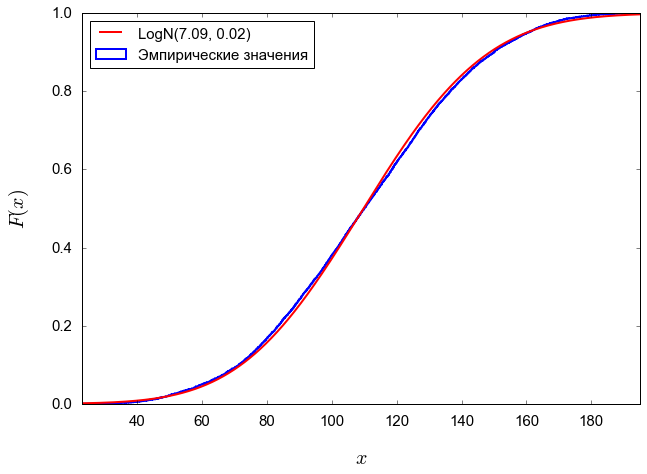

In [20]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, logn_cdf, label='LogN({0:.2f}, {1:.2f})'.format(logn_mu, logn_sigma), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_lognorm.png')
plt.show()


## Гамма-распределение

368187.255579
-18116.1458977
0.0495027787186


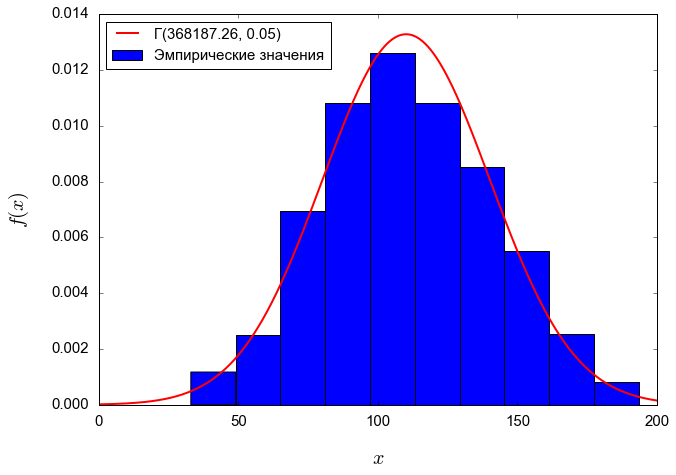

In [21]:
shape, loc, scale = st.gamma.fit(x)

print(shape)
print(loc)
print(scale)

gamma_k = shape
gamma_omega = scale

gamma_pdf = st.gamma.pdf(xes, gamma_k, loc=loc, scale=gamma_omega)
gamma_cdf = st.gamma.cdf(xes, gamma_k, loc=loc, scale=gamma_omega)

plt.figure(figsize=(10, 7))
plt.hist(s.values, normed=True, label='Эмпирические значения')
plt.plot(xes, gamma_pdf, label='Г({0:.2f}, {1:.2f})'.format(gamma_k, gamma_omega), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$f(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_gamma`.png')
plt.show()


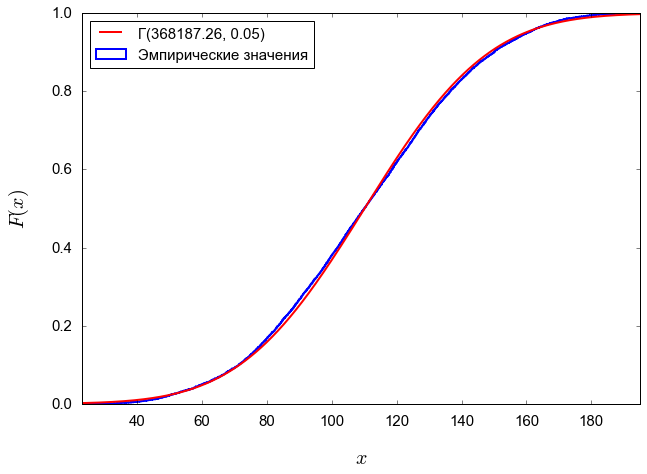

In [22]:
plt.figure(figsize=(10, 7))
plt.hist(x, num, normed=1, histtype='step', cumulative=True, label='Эмпирические значения', color='b', linewidth=2)
plt.plot(xes, gamma_cdf, label='Г({0:.2f}, {1:.2f})'.format(gamma_k, gamma_omega), color='r', linewidth=2)
plt.legend(loc='upper left', fontsize=15)
plt.xlim([min(x), max(x)-1])
plt.xlabel('$x$', fontsize=20, labelpad=20)
plt.ylabel('$F(x)$', fontsize=20, labelpad=20)
plt.tick_params(labelsize=15, pad=10)
plt.savefig('./../pics/dist_cum_gamma.png')
plt.show()


# 2.3